In [32]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from gensim.models import LdaSeqModel
import pandas as pd
# import ecopy as ep
import seaborn as sns
from scipy import stats
import sys
from skbio.diversity.alpha import shannon
import math

In [3]:
nTopics = 45

In [4]:
# 45 dtm topics
topic_names = [
'Streamflow',
'Groundwater',
'Wastewater Treatment',
'Ecosystem Studies',
'Hydrobiology',
'Hydrogeology',
'Mass-balance and Transfer',
'Sediment Transport',
'Rainfall-Runoff',
'Stochastic Models',
'Hydrochemistry',
'Microbiology',
'Nutrient and Heavy Metal Removal',
'Systems Hydrology',
'Quantitative Methods',
'Water Treatment',
'Irrigation',  
'Uncertainty',
'Biodegradation',
'Solute Transport',
'Land-Surface Flux',
'Modeling',
'Pollutant Sampling & Monitoring',
'Evaporation & Transpiration',
'Gauging & Monitoring',
'Reservoir Management',
'Pollutant Removal',
'Topography',
'Water Management Solutions',
'Vadose Zone',
'Ecological Modeling',
'Soil Chemistry',
'Water Policy and Planning',
'Surface Water Quality',
'Precipitation',
'Soil and Hydrometeorological Sampling',
'Infiltration',
'Spatial Variability',
'Numerical Modeling',
'Rainfall',
'Sedimentology',
'Groundwater Supply & Demand',
'Aquifers',
'Watershed Features',
'Climate Change Impacts',
]

In [5]:
# Define colors to associate with each topic
custom_colors = {
 'burlywood': '#DEB887',
 'chocolate': '#D2691E',
 'crimson': '#DC143C',
 'darkgreen': '#006400',
 'darkorange': '#FF8C00',
 'darkslategrey': '#2F4F4F',
 'deepskyblue': '#00BFFF',
 'dimgray': '#696969',
 'firebrick': '#B22222',
 'gold': '#FFD700',
 'goldenrod':'#DAA520',
 'lawngreen':'#7CFC00',
 'rosybrown':'#BC8F8F',
 'mediumslateblue':'#7B68EE',
 'mediumvioletred': '#C71585',
 'orangered': '#FF4500',
 'orchid': '#DA70D6',
 'royalblue': '#4169E1',
 'slateblue': '#6A5ACD',
 'springgreen': '#00FF7F',
 'steelblue': '#4682B4',
 'teal': '#008080',
 'turquoise': '#40E0D0',
 'chamoisee': '#A0785A',
 'blueviolet': '#8A2BE2',
 'yellowgreen': '#9ACD32',
 'cadmiumred': '#E30022',
 'royalblue': '#4169E1',
 'americanrose':  '#FF033E',
 'asparagus': '#87A96B',
 'coral':'#FF7F50',
 'magenta':'#FF00FF',
 'cadet':'#536872',
 'navy':'#000080',
 'bondiblue':'#0095B6',
 'blue':'#0000FF',
 'boysenberry':'#873260',
 'khaki':'#F0E68C',
 'cgblue':'#007AA5',
#  'linen':'#FAF0E6',
 'byzantine':'#BD33A4',
 'palevioletred':'#DB7093',
 'sienna':'#A0522D',
 'mediumspringgreen':'#00FA9A',
 'indianred':'#CD5C5C',
 'tomato': '#FF6347',
 'darkcyan': '#008B8B',
    
}

# turn into a list
colorlist = []
for i, color in enumerate(custom_colors.values()):
    colorlist.append(tuple(int(color.lstrip('#')[i:i+2], 16) for i in (0, 2, 4)))
    colorlist[i] = (colorlist[i][0] / 256, colorlist[i][1] / 256, colorlist[i][2] / 256)

In [6]:
# Load model
dtm_model = LdaSeqModel.load('trained_models/dtm_model45')

In [7]:
#load doc-topic distributions
with open('data/dtm_doc_topic_all.pkl', 'rb') as f:
    arr_arr = pkl.load(f)

# Load raw corpus dataframe
with open('data/raw_corpus_broad_dtm.pkl', 'rb') as f:
    corpus_df = pkl.load(f)
    
#sort dataframe by year

corpus_df_dtm = corpus_df.sort_values('Year', axis = 0, ascending = True, inplace=False)
corpus_df_dtm.reset_index(drop=True, inplace=True)

# creating an array of number of documents by year
time_slice_list = []
time_seq = []
for y, year in enumerate(np.unique(corpus_df_dtm['Year'])):
    time_slice_list.append((year,(corpus_df_dtm['Year']==year).value_counts()[1]))
    
time_slice = np.array(time_slice_list)[:,1].astype(np.int)
time_slice = time_slice.tolist()
time_seq = time_slice
    
    
# Pull years
years = np.unique(corpus_df['Year'])
    
# Create an array of all the doc-topic dist together
topic_dist = []

for y, year in enumerate(years):
    for p in range(time_seq[y]):
        topic_dist.append(arr_arr[y][p])
    
topic_distributions = np.array(topic_dist)


/var/folders/y0/kygdp4c13x56469jnrq5w3z80000gn/T/ipykernel_17742/3091301643.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  time_slice = np.array(time_slice_list)[:,1].astype(np.int)


In [8]:
# Pull topics
topics = dtm_model.print_topics(top_terms=20)
topics

[[('flow', 0.14590894375166233),
  ('discharge', 0.05545372190532527),
  ('stream', 0.053449923776802605),
  ('network', 0.047861178652654414),
  ('channel', 0.04694774274029255),
  ('river', 0.035425793275972915),
  ('drainage', 0.03229600085724704),
  ('basin', 0.014696040458538262),
  ('low', 0.013413750176182695),
  ('reach', 0.011544019801079684),
  ('downstream', 0.010703418907382944),
  ('route', 0.009364384619396962),
  ('slope', 0.008676093776521789),
  ('drain', 0.008519484591163895),
  ('length', 0.008239658485272463),
  ('width', 0.00822197238129336),
  ('path', 0.007881254641285985),
  ('stage', 0.007738251180104735),
  ('outflow', 0.007706304092217646),
  ('bank', 0.007371517020116261)],
 [('water', 0.07658573860505084),
  ('groundwater', 0.046694439209385395),
  ('recharge', 0.025717932329164615),
  ('aquifer', 0.016941020337892937),
  ('area', 0.015533746219469994),
  ('table', 0.01550164408599715),
  ('flow', 0.013452421473313497),
  ('system', 0.012058881718034261),
 

In [9]:
# Pull journals
journals = corpus_df.Journal.unique()
journals

array(['WRR', 'AWR', 'WR', 'JCH', 'JH', 'JWRPM', 'GW', 'HSJ', 'HP', 'WRM',
       'HESS', 'JAWRA', 'HGJ', 'JHM', 'WRI', 'ESWRT', 'JHREG', 'ISWCR'],
      dtype=object)

In [10]:
# Create an array of all the doc-topic dist together
topic_dist = []

for y, year in enumerate(years):
    for p in range(time_seq[y]):
        topic_dist.append(arr_arr[y][p])
    
topic_distribution = np.array(topic_dist)

In [11]:
#Calclulate mean shannon diversity per year and store in list

shannon_peryear = []
shannon_mean = []
    

for y, year in enumerate(years):
    
    for p in range(0,time_seq[y]):
        sd_pp = shannon(arr_arr[y][p])
        shannon_peryear.append(sd_pp)
        shannon_peryear_mean = np.mean(shannon_peryear)
    shannon_mean.append(shannon_peryear_mean)

In [12]:
#Calculate mean shannon diversity for entire corpus
shannon_mean_corpus = [np.sum(shannon_mean)/30] * len(years)
shannon_mean_corpus


[2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414,
 2.6882144806345414]

In [34]:
#Calclulate mean ent per year and store in list

ent_peryear = []
ent_mean = []
    

for y, year in enumerate(years):
    ent = math.exp(shannon_mean[y])
    ent_peryear.append(ent)

In [80]:
ent_peryear

[13.620945683922875,
 13.755876514584815,
 13.809435394383373,
 13.88971687214004,
 13.91449575724169,
 14.067504867387873,
 14.232887556154552,
 14.416981881488745,
 14.491173090718805,
 14.613070390789197,
 14.7084461528011,
 14.77057677965563,
 14.810874601874136,
 14.83675377536082,
 14.851742804492858,
 14.900729510872504,
 14.927326562018836,
 14.958417347456665,
 14.980127507378834,
 15.02463026837121,
 15.052419096148649,
 15.10110870446587,
 15.110412333613388,
 15.14090777649931,
 15.16974176639091,
 15.197088156325043,
 15.231006693751748,
 15.256035627381932,
 15.293531708548317,
 15.294097868263723]

In [37]:
#Calculate mean shannon diversity for entire corpus
ent_mean = [np.sum(ent_peryear)/30] * len(years)
ent_mean

[14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945,
 14.71426876834945]

/var/folders/y0/kygdp4c13x56469jnrq5w3z80000gn/T/ipykernel_17742/3878846081.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax1.plot(years[:-1],shannon_mean_corpus[:-1],'k--', color = 'blue', label = 'Mean Shannon Diversity',linewidth = 4)
/var/folders/y0/kygdp4c13x56469jnrq5w3z80000gn/T/ipykernel_17742/3878846081.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax2.plot(years[:-1], ent_mean[:-1],'k--', color = 'brown', label = 'Mean ENT',linewidth = 4)
/var/folders/y0/kygdp4c13x56469jnrq5w3z80000gn/T/ipykernel_17742/3878846081.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels = years, rotation=90)


<Figure size 432x288 with 0 Axes>

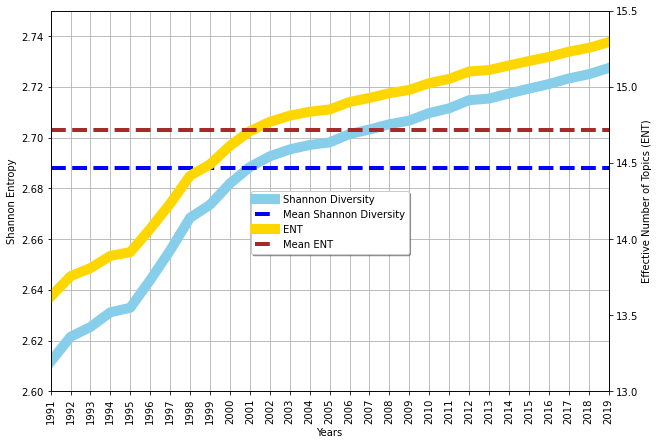

In [79]:
#Plot shannon diversity and ent

fig = plt.figure()
fig, ax1 = plt.subplots(figsize=(10,7))
ax2 = ax1.twinx()
ax1.plot(years[:-1], shannon_mean[:-1], color = 'skyblue', label = 'Shannon Diversity',linewidth = 10)
ax1.plot(years[:-1],shannon_mean_corpus[:-1],'k--', color = 'blue', label = 'Mean Shannon Diversity',linewidth = 4)
ax2.plot(years[:-1], ent_peryear[:-1], color = 'gold', label = 'ENT',linewidth = 10)
ax2.plot(years[:-1], ent_mean[:-1],'k--', color = 'brown', label = 'Mean ENT',linewidth = 4)
plt.xlim(0,28)
ax1.set_ylim(2.60,2.75)
ax2.set_ylim(13,15.5)
ax1.set_xticklabels(labels = years, rotation=90)
ax1.set_ylabel('Shannon Entropy')
ax2.set_ylabel('Effective Number of Topics (ENT)')
ax1.set_xlabel('Years')
ax1.grid()
# ax1.legend(loc = 'right', fancybox = True, shadow = True)
fig.legend(loc = 'center', fancybox = True, shadow = True)
plt.savefig('figures/diversity_ent_dtm.png')    

In [12]:
#Commented out hereforth because ecopy is deprecated 

# # H(x) = - sum P(x)log P(x)
# def calc_entropy(pmf):
#     return -np.nansum(pmf * np.log(pmf)) #code implementation of entropy equation

In [13]:
# topic_distributions = np.where(topic_distributions == 0, 0.000000001, topic_distributions)

/home/mashrekur/anaconda3/lib/python3.7/site-packages/ecopy/diversity/diversity.py:147: RuntimeWarning: invalid value encountered in double_scalars
  return H/np.log(n)


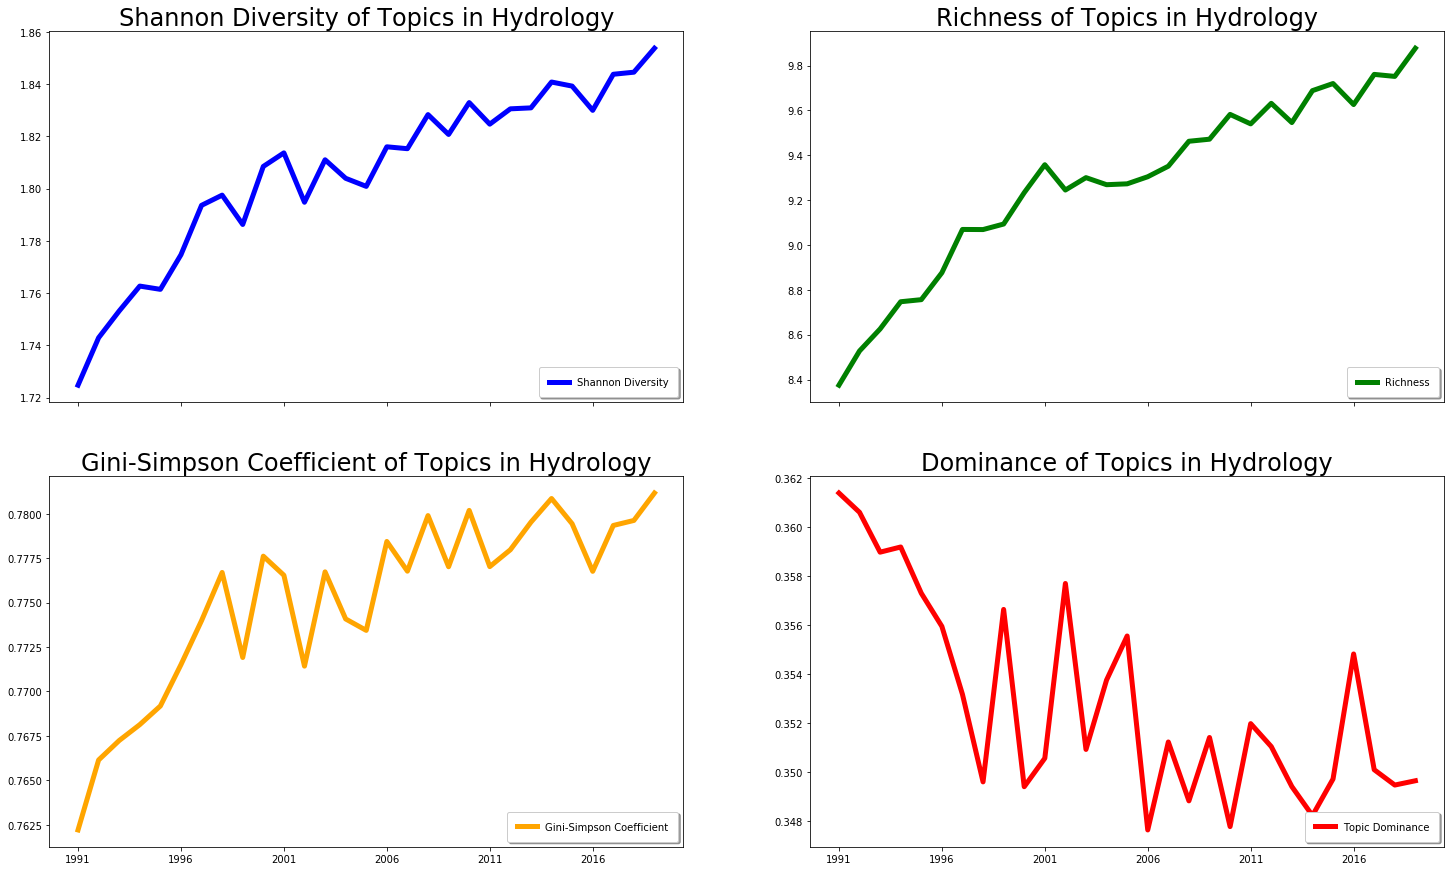

In [14]:
# # Diversity of corpus
# diversity_metrics = ['shannon', 'simpson', 'gini-simpson', 'dominance', 'even','spRich']
# # corpus_diversity = pd.DataFrame(index = years, columns = diversity_metrics)

# shannon_diversity = {}
# richness = {}
# gini_diversity = {}
# dominance = {}
# evenness = {}
# shannon_diversity_mean = []
# richness_mean = []
# gini_diversity_mean = []
# dominance_mean = []
# evenness_mean = []
# t_test = []


# for y, year in enumerate(years):
#     topic_distributions_year = topic_distributions[corpus_df['Year'] == year,:]

#     shannon_diversity[year] = ep.diversity(topic_distributions_year, method = 'shannon', breakNA=False, num_equiv=False)
#     richness[year] = ep.diversity(topic_distributions_year, method = 'spRich', breakNA=False, num_equiv=False)
#     gini_diversity[year] = ep.diversity(topic_distributions_year, method = 'gini-simpson', breakNA=False, num_equiv=False)
#     dominance[year] = ep.diversity(topic_distributions_year, method = 'dominance', breakNA=False, num_equiv=False)
#     evenness[year] = ep.diversity(topic_distributions_year, method = 'even', breakNA=False, num_equiv=False)

#     shannon_diversity_mean.append(np.mean(shannon_diversity[year]))
#     richness_mean.append(np.mean(richness[year]))
#     gini_diversity_mean.append(np.mean(gini_diversity[year]))
#     dominance_mean.append(np.mean(dominance[year]))
#     evenness_mean.append(np.mean(evenness[year]))
    
# #     if y > 0:
# # #         print((stats.ttest_ind(shannon_diversity[years[y]],shannon_diversity[years[y-1]])))
# #         t_test.append(stats.ttest_ind(shannon_diversity[years[y]],shannon_diversity[years[y-1]]))
# # #         print(t_test)

# # plt.plot(t_test[:])

# # plt.show()
# #         print(year, np.median(shannon_diversity[year]), np.mean(shannon_diversity[year]), np.std(shannon_diversity[year]))
        
# fig, axs = plt.subplots(2,2,figsize=(25,15),sharex=True,sharey = False)

# axs[0, 0].plot(years[:-1], shannon_diversity_mean[:-1], color = 'blue', label = 'Shannon Diversity',linewidth = 5)
# axs[0, 0].set_title('Shannon Diversity of Topics in Hydrology',size=24)

# axs[0, 1].plot(years[:-1], richness_mean[:-1], color = 'green', label = 'Richness',linewidth = 5)
# axs[0, 1].set_title('Richness of Topics in Hydrology',size=24)

# axs[1, 0].plot(years[:-1], gini_diversity_mean[:-1], color = 'orange', label = 'Gini-Simpson Coefficient',linewidth = 5)
# axs[1, 0].set_title('Gini-Simpson Coefficient of Topics in Hydrology',size=24)

# axs[1, 1].plot(years[:-1], dominance_mean[:-1], color = 'red', label = 'Topic Dominance',linewidth = 5)
# axs[1, 1].set_title('Dominance of Topics in Hydrology',size=24)

# axs[0,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
# axs[0,1].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
# axs[1,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
# axs[1,1].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)


# plt.xticks(years[0::5])
    
# plt.savefig('figures/diversity_year_mean.png')    

In [15]:
# # Diversity of corpus w/o GW
# diversity_metrics = ['shannon', 'simpson', 'gini-simpson', 'dominance', 'even','spRich']
# # corpus_diversity = pd.DataFrame(index = years, columns = diversity_metrics)

# shannon_diversity_wogw = {}
# simpson_diversity_wogw = {}
# gini_diversity_wogw = {}
# dominance_wogw = {}
# shannon_diversity_mean_wogw = []
# simpson_diversity_mean_wogw = []
# gini_diversity_mean_wogw = []
# dominance_mean_wogw = []
# # t_test = []


# for y, year in enumerate(years):
#     topic_distributions_year = topic_distributions_wogw[corpus_df_wogw['Year'] == year,:]

#     shannon_diversity_wogw[year] = ep.diversity(topic_distributions_year, method = 'shannon', breakNA=False, num_equiv=False)
#     simpson_diversity_wogw[year] = ep.diversity(topic_distributions_year, method = 'simpson', breakNA=False, num_equiv=False)
#     gini_diversity_wogw[year] = ep.diversity(topic_distributions_year, method = 'gini-simpson', breakNA=False, num_equiv=False)
#     dominance_wogw[year] = ep.diversity(topic_distributions_year, method = 'dominance', breakNA=False, num_equiv=False)
# #     evenness[year] = ep.diversity(topic_distributions_year, method = 'even', breakNA=False, num_equiv=False)

#     shannon_diversity_mean_wogw.append(np.mean(shannon_diversity_wogw[year]))
#     simpson_diversity_mean_wogw.append(np.mean(simpson_diversity_wogw[year]))
#     gini_diversity_mean_wogw.append(np.mean(gini_diversity_wogw[year]))
#     dominance_mean_wogw.append(np.mean(dominance_wogw[year]))
# #     evenness_mean.append(np.mean(evenness[year]))
    
# #     if y > 0:
# # #         print((stats.ttest_ind(shannon_diversity[years[y]],shannon_diversity[years[y-1]])))
# #         t_test.append(stats.ttest_ind(shannon_diversity[years[y]],shannon_diversity[years[y-1]]))
# # #         print(t_test)

# # plt.plot(t_test[:])

# # plt.show()
# # print(year, np.median(shannon_diversity[year]), np.mean(shannon_diversity[year]), np.std(shannon_diversity[year]))
        
# fig, ((axs[0, 0],axs[0, 1]),(axs[1, 0],axs[1, 1])) = plt.subplots(2,2,figsize=(25,15),sharex=True,sharey = False)
# fig.add_gridspec(1,4)

# l1 = axs[0, 0].plot(years[:-1], shannon_diversity_mean[:-1], color = 'blue', label = 'Full Corpus',linewidth = 5)
# l2 = axs[0, 0].plot(years[:-1], shannon_diversity_mean_wogw[:-1], color = 'red', label = 'Without GW',linewidth = 5)
# l3 = axs[0, 0].set_title('Shannon',size=24)
# l4 = axs[0, 1].plot(years[:-1], simpson_diversity_mean[:-1], color = 'blue', label = 'Full Corpus',linewidth = 5)
# l5 = axs[0, 1].plot(years[:-1], simpson_diversity_mean_wogw[:-1], color = 'red', label = 'Without GW',linewidth = 5)
# l6 = axs[0, 1].set_title('Simpson',size=24)
# l7 = axs[1, 0].plot(years[:-1], gini_diversity_mean[:-1], color = 'blue', label = 'Full Corpus',linewidth = 5)
# l8 = axs[1, 0].plot(years[:-1], gini_diversity_mean_wogw[:-1], color = 'red', label = 'Without GW',linewidth = 5)
# l9 = axs[1, 0].set_title('Gini-Simpson',size=24)
# l10 = axs[1, 1].plot(years[:-1], dominance_mean[:-1], color = 'blue', label = 'Full Corpus',linewidth = 5)
# l11 = axs[1, 1].plot(years[:-1], dominance_mean_wogw[:-1], color = 'red', label = 'Without GW',linewidth = 5)
# l12 = axs[1, 1].set_title('Dominance',size=24)

# axs[0,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
# axs[0,1].legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
# axs[1,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
# axs[1,1].legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)


# plt.xticks(years[0::5])


# plt.savefig('figures/diversity_year_mean_wogw.png')



#standard deviations as error bars/uncertainty bounds {done}
#mean diversity and std over whole corpus {done}
# one set of topic distributions per year, take mean of topic dist, yearwise mean diversity of the topic distributions {done}
#bar graphs

In [16]:
# #Calculate std deviations of diversity metrics over corpus
# shannon_diversity_std = []
# richness_std = []
# gini_diversity_std = []
# dominance_std = []

# for y, year in enumerate(years):
#     topic_distributions_year = topic_distributions[corpus_df['Year'] == year,:]

#     shannon_diversity[year] = ep.diversity(topic_distributions_year, method = 'shannon', breakNA=False, num_equiv=False)
#     gini_diversity[year] = ep.diversity(topic_distributions_year, method = 'gini-simpson', breakNA=False, num_equiv=False)
#     dominance[year] = ep.diversity(topic_distributions_year, method = 'dominance', breakNA=False, num_equiv=False)
#     richness[year] = ep.diversity(topic_distributions_year, method = 'spRich', breakNA=False, num_equiv=False)
   

#     shannon_diversity_std.append(np.std(shannon_diversity[year]))    
#     gini_diversity_std.append(np.std(gini_diversity[year]))
#     dominance_std.append(np.std(dominance[year]))
#     richness_std.append(np.std(richness[year]))


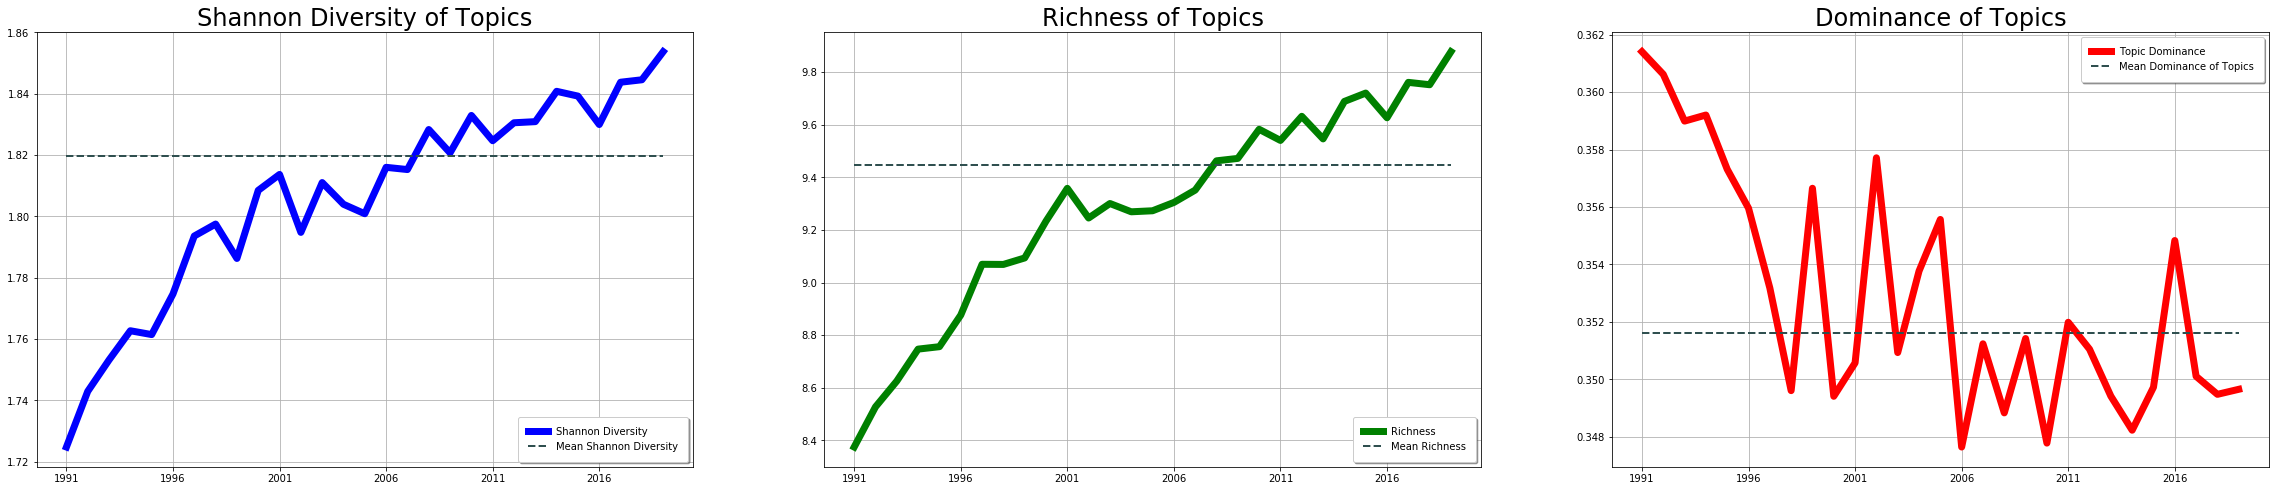

In [17]:
# #mean diversity and standard deviations over entire corpus
# #Richness: Number of species represented in a site; blind to their relative abundance distributions

# mean_shannon_corpus = np.mean(ep.diversity(topic_distributions, method = 'shannon', breakNA=False, num_equiv=False))
# mean_gini_corpus = np.mean(ep.diversity(topic_distributions, method = 'gini-simpson', breakNA=False, num_equiv=False))
# mean_dominance_corpus = np.mean(ep.diversity(topic_distributions, method = 'dominance', breakNA=False, num_equiv=False))
# mean_richness_corpus = np.mean(ep.diversity(topic_distributions, method = 'spRich', breakNA=False, num_equiv=False))

# plot_mean_shannon_corpus = np.full(len(years),mean_shannon_corpus)
# plot_mean_gini_corpus = np.full(len(years),mean_gini_corpus)
# plot_mean_dominance_corpus = np.full(len(years),mean_dominance_corpus)
# plot_mean_richness_corpus = np.full(len(years),mean_richness_corpus)
     
    
# fig, axs = plt.subplots(1,3,figsize=(40,8),sharex=True,sharey = False)


# axs[0].plot(years[:-1], shannon_diversity_mean[:-1], color = 'blue', label = 'Shannon Diversity',linewidth = 7)
# axs[0].plot(years[:-1],plot_mean_shannon_corpus[:-1],'k--', color = 'darkslategrey', label = 'Mean Shannon Diversity',linewidth = 2)
# # axs[0, 0].errorbar(years[:-1],shannon_diversity_mean[:-1],shannon_diversity_std[:-1],marker ='^',fmt='o', label = 'Standard Deviation',capsize=10)
# axs[0].set_title('Shannon Diversity of Topics',size=24)
# axs[0].grid()


# axs[1].plot(years[:-1], richness_mean[:-1], color = 'green', label = 'Richness',linewidth = 7)
# axs[1].plot(years[:-1],plot_mean_richness_corpus[:-1],'k--', color = 'darkslategrey', label = 'Mean Richness',linewidth = 2)
# # axs[0, 1].errorbar(years[:-1],richness_mean[:-1],richness_std[:-1],marker ='^',fmt='o', label = 'Standard Deviation',capsize=10)
# axs[1].set_title('Richness of Topics',size=24)
# axs[1].grid()

# # axs[1, 0].plot(years[:-1], gini_diversity_mean[:-1], color = 'orange', label = 'Gini-Simpson Coefficient',linewidth = 5)
# # axs[1, 0].plot(years[:-1],plot_mean_gini_corpus[:-1],'k--', color = 'darkslategrey', label = 'Mean Gini-Simpson Coefficient',linewidth = 2)
# # axs[1, 0].errorbar(years[:-1],gini_diversity_mean[:-1],gini_diversity_std[:-1],marker ='^',fmt='o', label = 'Standard Deviation',capsize=10)
# # axs[1, 0].set_title('Gini-Simpson Coefficient of Topics in Hydrology',size=24)

# axs[2].plot(years[:-1], dominance_mean[:-1], color = 'red', label = 'Topic Dominance',linewidth = 7)
# axs[2].plot(years[:-1],plot_mean_dominance_corpus[:-1],'k--', color = 'darkslategrey', label = 'Mean Dominance of Topics',linewidth = 2)
# # axs[1, 1].errorbar(years[:-1],dominance_mean[:-1],dominance_std[:-1],marker ='^',fmt='o', label = 'Standard Deviation',capsize=10)
# axs[2].set_title('Dominance of Topics',size=24)
# axs[2].grid()

# axs[0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
# axs[1].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
# axs[2].legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
# # axs[1,1].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

# plt.xticks(years[0::5])

# plt.savefig('figures/diversity_richness_dominance_mean.png')

In [30]:
pg.corr(np.array(range(0,29,1)), np.array(shannon_mean[:-1]))

,n,r,CI95%,p-val,BF10,power
pearson,29,0.944678,"[0.88, 0.97]",1.360600e-14,3.387e+11,1.0


In [18]:
# #plotting bar graphs
# fig, axs = plt.subplots(2,2,figsize=(25,15),sharex=True,sharey = False)
# fig.add_gridspec(1,4)

# axs[0, 0].bar(years[:-1], shannon_diversity_mean[:-1], color = 'deepskyblue', label = 'Shannon Diversity', linewidth = 5)
# axs[0, 0].errorbar(years[:-1],shannon_diversity_mean[:-1],shannon_diversity_std[:-1],color='black',marker ='o',fmt='o', label = 'Standard Deviation',capsize=10)
# axs[0, 0].set_title('Shannon Diversity of Topics in Hydrology',size=24)

# axs[0, 1].bar(years[:-1], richness_mean[:-1], color = 'lightseagreen', label = 'Richness', linewidth = 5)
# axs[0, 1].errorbar(years[:-1],richness_mean[:-1],richness_std[:-1],color='black',marker ='o',fmt='o', label = 'Standard Deviation',capsize=10)
# axs[0, 1].set_title('Richness of Topics in Hydrology',size=24)

# axs[1, 0].bar(years[:-1], gini_diversity_mean[:-1], color = 'darkorange', label = 'Gini-Simpson Coefficient', linewidth = 5)
# axs[1, 0].errorbar(years[:-1],gini_diversity_mean[:-1],gini_diversity_std[:-1],color='black',marker ='o',fmt='o', label = 'Standard Deviation',capsize=10)
# axs[1, 0].set_title('Gini-Simpson Coefficient of Topics in Hydrology',size=24)

# axs[1, 1].bar(years[:-1], dominance_mean[:-1], color = 'tomato', label = 'Dominance', linewidth = 5)
# axs[1, 1].errorbar(years[:-1],dominance_mean[:-1], dominance_std[:-1],color='black',marker ='o',fmt='o', label = 'Standard Deviation',capsize=10)
# axs[1, 1].set_title('Dominance of Topics in Hydrology',size=24)

# axs[0,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
# axs[0,1].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
# axs[1,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
# axs[1,1].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

# plt.xticks(years[0::5])

# plt.savefig('figures/diversity_bar_chart.png')


SyntaxError: EOL while scanning string literal (<ipython-input-18-2ec429f471d7>, line 24)

In [ ]:
# #diversities journal-wise

# shannon_diversity_journal_mean = []
# gini_diversity_journal_mean = []
# dominance_journal_mean = []
# richness_journal_mean = []

# shannon_diversity_journal_std = []
# gini_diversity_journal_std = []
# dominance_journal_std = [] 
# richness_journal_std = []

# for j, journal in enumerate(journals):
#     topic_distributions_journal = topic_distributions[corpus_df['Journal'] == journal,:]

#     shannon_diversity[journal] = ep.diversity(topic_distributions_journal, method = 'shannon', breakNA=False, num_equiv=False)
#     gini_diversity[journal] = ep.diversity(topic_distributions_journal, method = 'gini-simpson', breakNA=False, num_equiv=False)
#     dominance[journal] = ep.diversity(topic_distributions_journal, method = 'dominance', breakNA=False, num_equiv=False)
#     richness[journal] = ep.diversity(topic_distributions_journal, method = 'spRich', breakNA=False, num_equiv=False)
   

#     shannon_diversity_journal_mean.append(np.mean(shannon_diversity[journal]))    
#     gini_diversity_journal_mean.append(np.mean(gini_diversity[journal]))
#     dominance_journal_mean.append(np.mean(dominance[journal]))
#     richness_journal_mean.append(np.mean(richness[journal]))
    
#     shannon_diversity_journal_std.append(np.std(shannon_diversity[journal]))    
#     gini_diversity_journal_std.append(np.std(gini_diversity[journal]))
#     dominance_journal_std.append(np.std(dominance[journal]))
#     richness_journal_std.append(np.std(richness[journal]))


# #plotting bar graphs
# fig, axs = plt.subplots(1,3,figsize=(25,15),sharex=True,sharey = False)
# fig.add_gridspec(1,4)

# axs[0, 0].bar(journals, shannon_diversity_journal_mean, color = 'deepskyblue', label = 'Shannon Diversity', linewidth = 5)
# axs[0, 0].errorbar(journals,shannon_diversity_journal_mean, shannon_diversity_journal_std, color='black',marker ='o',fmt='o', label = 'Standard Deviation',capsize=10)
# axs[0, 0].set_title('Shannon Diversity of Topics in Journals',size=24)

# axs[0, 1].bar(journals, richness_journal_mean, color = 'lightseagreen', label = 'Richness', linewidth = 5)
# axs[0, 1].errorbar(journals, richness_journal_mean, richness_journal_std, color='black',marker ='o',fmt='o', label = 'Standard Deviation',capsize=10)
# axs[0, 1].set_title('Richness of Topics in Journals',size=24)

# axs[1, 0].bar(journals, gini_diversity_journal_mean, color = 'darkorange', label = 'Gini-Simpson Coefficient', linewidth = 5)
# axs[1, 0].errorbar(journals, gini_diversity_journal_mean, gini_diversity_journal_std, color='black',marker ='o',fmt='o', label = 'Standard Deviation',capsize=10)
# axs[1, 0].set_title('Gini-Simpson Coefficient of Topics in Journals',size=24)

# axs[1, 1].bar(journals, dominance_journal_mean, color = 'tomato', label = 'Dominance', linewidth = 5)
# axs[1, 1].errorbar(journals, dominance_journal_mean, dominance_journal_std, color='black',marker ='o',fmt='o', label = 'Standard Deviation',capsize=10)
# axs[1, 1].set_title('Dominance of Topics in Journals',size=24)

# axs[0,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
# axs[0,1].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
# axs[1,0].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
# axs[1,1].legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)


# plt.savefig('figures/diversity_journal_bar_chart.png')

In [ ]:
# col1 = ['Shannon']
# col2 = ['Richness']
# col3 = ['Gini-Simpson']
# col4 = ['Dominance']
# shannon_df = pd.DataFrame(data = shannon_diversity_journal_mean, columns = col1, index = journals)
# richness_df = pd.DataFrame(data = richness_journal_mean, columns = col2, index = journals)
# gini_df = pd.DataFrame(data = gini_diversity_journal_mean, columns = col3, index = journals)
# dominance_df = pd.DataFrame(data = dominance_journal_mean, columns = col4, index = journals)

# shannon_df_sort = shannon_df.sort_values('Shannon')
# richness_df_sort = richness_df.sort_values('Richness')
# gini_df_sort = gini_df.sort_values('Gini-Simpson')
# dominance_df_sort = dominance_df.sort_values('Dominance')


# #plotting bar graphs - sorted

# ax1 = shannon_df_sort.plot.bar()
# ax1.set_title('Shannon Diversity of Topics in Journals',size=12)

# ax2 = richness_df_sort.plot.bar()
# ax2.set_title('Richness of Topics in Journals',size=12)

# ax3 = gini_df_sort.plot.bar()
# ax3.set_title('Gini-Simpson Coefficient of Topics in Journals',size=12)

# ax4 = dominance_df_sort.plot.bar()
# ax4.set_title('Dominance of Topics in Journals', size = 12)


# plt.savefig('figures/diversity_journal_sort_bar_chart.png')